In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import string
import re
import string
import re
import nltk
from sklearn import metrics

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
train_data=pd.read_csv("../input/nlp-getting-started/train.csv")
test_data=pd.read_csv("../input/nlp-getting-started/test.csv")

In [3]:
train_data.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [4]:
test_data.head(10)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


In [5]:
train_data.shape

(7613, 5)

In [6]:
test_data.shape

(3263, 4)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [9]:
train_data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [10]:
test_data.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [11]:
train_data=pd.DataFrame(train_data[['text','target']])

In [12]:
test_data=pd.DataFrame(test_data[['text']])

In [13]:
print("Count of Disaster Tweets:-")
print(len(train_data[train_data['target']==0]))
print("Count of no Disaster Tweets:-")
print(len(train_data[train_data['target']==1]))

Count of Disaster Tweets:-
4342
Count of no Disaster Tweets:-
3271


In [14]:
target_cnt=train_data['target'].value_counts().to_frame()
print(target_cnt)

   target
0    4342
1    3271


<AxesSubplot:ylabel='target'>

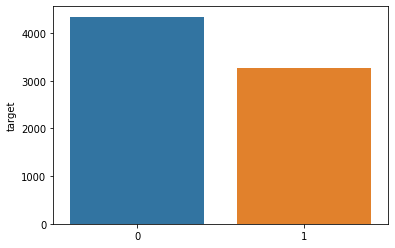

In [15]:
sns.barplot(data=target_cnt,x=target_cnt.index,y="target",)

In [16]:
def remove_punch(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text
train_data['text'] = train_data['text'].apply(lambda x: remove_punch(x))
test_data['text']=test_data['text'].apply(lambda x: remove_punch(x))

print("Train Data")
print(train_data.head(10))
print("\n\n\n\n")
print("Test Data")
print(test_data.head(10))


Train Data
                                                text  target
0  Our Deeds are the Reason of this earthquake Ma...       1
1              Forest fire near La Ronge Sask Canada       1
2  All residents asked to shelter in place are be...       1
3   people receive wildfires evacuation orders in...       1
4  Just got sent this photo from Ruby Alaska as s...       1
5  RockyFire Update  California Hwy  closed in bo...       1
6  flood disaster Heavy rain causes flash floodin...       1
7  Im on top of the hill and I can see a fire in ...       1
8  Theres an emergency evacuation happening now i...       1
9   Im afraid that the tornado is coming to our area       1





Test Data
                                                text
0                 Just happened a terrible car crash
1  Heard about earthquake is different cities sta...
2  there is a forest fire at spot pond geese are ...
3              Apocalypse lighting Spokane wildfires
4        Typhoon Soudelor kills  in Ch

In [17]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

train_data['text'] = train_data['text'].apply(lambda x: tokenization(x.lower()))
test_data['text']=test_data['text'].apply(lambda x: tokenization(x.lower()))

print("Train Data")
print(train_data.head(10))
print("\n\n\n\n")
print("Test Data")
print(test_data.head(10))


Train Data
                                                text  target
0  [our, deeds, are, the, reason, of, this, earth...       1
1      [forest, fire, near, la, ronge, sask, canada]       1
2  [all, residents, asked, to, shelter, in, place...       1
3  [, people, receive, wildfires, evacuation, ord...       1
4  [just, got, sent, this, photo, from, ruby, ala...       1
5  [rockyfire, update, california, hwy, closed, i...       1
6  [flood, disaster, heavy, rain, causes, flash, ...       1
7  [im, on, top, of, the, hill, and, i, can, see,...       1
8  [theres, an, emergency, evacuation, happening,...       1
9  [im, afraid, that, the, tornado, is, coming, t...       1





Test Data
                                                text
0          [just, happened, a, terrible, car, crash]
1  [heard, about, earthquake, is, different, citi...
2  [there, is, a, forest, fire, at, spot, pond, g...
3         [apocalypse, lighting, spokane, wildfires]
4  [typhoon, soudelor, kills, in, chin

In [18]:
stopword = nltk.corpus.stopwords.words('english')

In [19]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
train_data['text'] = train_data['text'].apply(lambda x: remove_stopwords(x))
test_data['text']=test_data['text'].apply(lambda x: remove_stopwords(x))

print("Train Data")
print(train_data.head(10))
print("\n\n\n\n")
print("Test Data")
print(test_data.head(10))

Train Data
                                                text  target
0  [deeds, reason, earthquake, may, allah, forgiv...       1
1      [forest, fire, near, la, ronge, sask, canada]       1
2  [residents, asked, shelter, place, notified, o...       1
3  [, people, receive, wildfires, evacuation, ord...       1
4  [got, sent, photo, ruby, alaska, smoke, wildfi...       1
5  [rockyfire, update, california, hwy, closed, d...       1
6  [flood, disaster, heavy, rain, causes, flash, ...       1
7                  [im, top, hill, see, fire, woods]       1
8  [theres, emergency, evacuation, happening, bui...       1
9                [im, afraid, tornado, coming, area]       1





Test Data
                                                text
0                   [happened, terrible, car, crash]
1  [heard, earthquake, different, cities, stay, s...
2  [forest, fire, spot, pond, geese, fleeing, acr...
3         [apocalypse, lighting, spokane, wildfires]
4          [typhoon, soudelor, kills, 

In [20]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

train_data['text'] = train_data['text'].apply(lambda x: stemming(x))
test_data['text']=test_data['text'].apply(lambda x: stemming(x))

print("Train Data")
print(train_data.head(10))
print("\n\n\n\n")
print("Test Data")
print(test_data.head(10))

Train Data
                                                text  target
0  [deed, reason, earthquak, may, allah, forgiv, us]       1
1       [forest, fire, near, la, rong, sask, canada]       1
2  [resid, ask, shelter, place, notifi, offic, ev...       1
3  [, peopl, receiv, wildfir, evacu, order, calif...       1
4  [got, sent, photo, rubi, alaska, smoke, wildfi...       1
5  [rockyfir, updat, california, hwi, close, dire...       1
6  [flood, disast, heavi, rain, caus, flash, floo...       1
7                   [im, top, hill, see, fire, wood]       1
8  [there, emerg, evacu, happen, build, across, s...       1
9                  [im, afraid, tornado, come, area]       1





Test Data
                                                text
0                      [happen, terribl, car, crash]
1  [heard, earthquak, differ, citi, stay, safe, e...
2  [forest, fire, spot, pond, gees, flee, across,...
3                [apocalyps, light, spokan, wildfir]
4           [typhoon, soudelor, kill, 

In [21]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

train_data['text'] = train_data['text'].apply(lambda x: lemmatizer(x))
test_data['text']=test_data['text'].apply(lambda x: lemmatizer(x))

print("Train Data")
print(train_data.head(10))
print("\n\n\n\n")
print("Test Data")
print(test_data.head(10))

Train Data
                                                text  target
0   [deed, reason, earthquak, may, allah, forgiv, u]       1
1       [forest, fire, near, la, rong, sask, canada]       1
2  [resid, ask, shelter, place, notifi, offic, ev...       1
3  [, peopl, receiv, wildfir, evacu, order, calif...       1
4  [got, sent, photo, rubi, alaska, smoke, wildfi...       1
5  [rockyfir, updat, california, hwi, close, dire...       1
6  [flood, disast, heavi, rain, caus, flash, floo...       1
7                   [im, top, hill, see, fire, wood]       1
8  [there, emerg, evacu, happen, build, across, s...       1
9                  [im, afraid, tornado, come, area]       1





Test Data
                                                text
0                      [happen, terribl, car, crash]
1  [heard, earthquak, differ, citi, stay, safe, e...
2  [forest, fire, spot, pond, gee, flee, across, ...
3                [apocalyps, light, spokan, wildfir]
4           [typhoon, soudelor, kill, 

In [22]:
stemmer = nltk.stem.PorterStemmer()
train_data["text"]=train_data["text"].apply(lambda x:" ".join(stemmer.stem(token) for token in x))
test_data["text"]=test_data["text"].apply(lambda x:" ".join(stemmer.stem(token) for token in x))

In [23]:
train_data

,text,target
0,deed reason earthquak may allah forgiv u,1
1,forest fire near la rong sask canada,1
2,resid ask shelter place notifi offic evacu she...,1
3,peopl receiv wildfir evacu order california,1
4,got sent photo rubi alaska smoke wildfir pour ...,1
...,...,...
7608,two giant crane hold bridg collap nearbi home ...,1
7609,ariaahrari thetawniest control wild fire calif...,1
7610,utckm volcano hawaii httptcozdtoydebj,1
7611,polic investig ebik collid car littl portug eb...,1


In [24]:
test_data

,text
0,happen terribl car crash
1,heard earthquak differ citi stay safe everyon
2,forest fire spot pond gee flee across street c...
3,apocalyp light spokan wildfir
4,typhoon soudelor kill china taiwan
...,...
3258,earthquak safeti lo angel ûò safeti fasten xrwn
3259,storm ri wor last hurrican cityampoth hardest ...
3260,green line derail chicago httptcoutbxlcbiuy
3261,meg issu hazard weather outlook hwo httptcoxrb...


In [25]:
from sklearn.model_selection import train_test_split
X, y = train_data['text'],train_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [26]:
X_test.shape

(1523,)

In [27]:
y_test.shape

(1523,)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()


In [29]:
X_test.shape

(1523, 56875)

In [30]:
X_train.shape

(6090, 56875)

In [31]:
from sklearn.linear_model import LogisticRegression


In [32]:
model = LogisticRegression().fit(X_train, y_train)

In [33]:
print(model.score(X_test, y_test))

0.793827971109652


In [34]:
y_pred = model.predict(X_test)

In [35]:
CM = pd.crosstab(y_test, y_pred)

In [36]:
CM

col_0,0,1
target,,
0,755,92
1,222,454


In [37]:
test_data

,text
0,happen terribl car crash
1,heard earthquak differ citi stay safe everyon
2,forest fire spot pond gee flee across street c...
3,apocalyp light spokan wildfir
4,typhoon soudelor kill china taiwan
...,...
3258,earthquak safeti lo angel ûò safeti fasten xrwn
3259,storm ri wor last hurrican cityampoth hardest ...
3260,green line derail chicago httptcoutbxlcbiuy
3261,meg issu hazard weather outlook hwo httptcoxrb...


In [38]:
test_data=test_data['text']

In [39]:
test_data

0                                happen terribl car crash
1           heard earthquak differ citi stay safe everyon
2       forest fire spot pond gee flee across street c...
3                           apocalyp light spokan wildfir
4                      typhoon soudelor kill china taiwan
                              ...                        
3258      earthquak safeti lo angel ûò safeti fasten xrwn
3259    storm ri wor last hurrican cityampoth hardest ...
3260          green line derail chicago httptcoutbxlcbiuy
3261    meg issu hazard weather outlook hwo httptcoxrb...
3262      cityofcalgari activ municip emerg plan yycstorm
Name: text, Length: 3263, dtype: object

In [40]:
test_data_v = vectorizer.transform(test_data).toarray()

In [41]:
test_data_v=np.array(test_data_v)

In [42]:
test_data_v

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
len(vectorizer.get_feature_names())

56875

In [44]:
test_data_pred=model.predict(test_data_v)

In [45]:
test_data_pred

array([1, 1, 1, ..., 1, 1, 1])

In [46]:
test_data=pd.read_csv("../input/nlp-getting-started/test.csv")

In [47]:
test_data['target']=test_data_pred

In [48]:
csv_data=test_data[['id','target']]
csv_data.to_csv('final_submission.csv', index = False)